![](https://i2.wp.com/9to5mac.com/wp-content/uploads/sites/6/2018/06/bitcoin.jpg)

# Introduction

## LSTM Networks

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

LSTMs are a complex area of deep learning. It can be hard to get your hands around what LSTMs are, and how terms like bidirectional and sequence-to-sequence relate to the field.

In this post, you will get insight into LSTMs using the words of research scientists that developed the methods and applied them to new and important problems.

There are few that are better at clearly and precisely articulating both the promise of LSTMs and how they work than the experts that developed them.

We will explore key questions in the field of LSTMs using quotes from the experts, and if you’re interested, you will be able to dive into the original papers from which the quotes were taken.

## GRU

Gated recurrent units are a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al. The GRU is like a long short-term memory with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate.

How do GRUs work?
As mentioned above, GRUs are improved version of standard recurrent neural network. But what makes them so special and effective?
To solve the vanishing gradient problem of a standard RNN, GRU uses, so-called, update gate and reset gate. Basically, these are two vectors which decide what information should be passed to the output. The special thing about them is that they can be trained to keep information from long ago, without washing it through time or remove information which is irrelevant to the prediction.

![](https://blog.floydhub.com/content/images/2019/07/image12.jpg)

# Preparation

First, we need to install the necessary libraries in order to create our Neural Network. Next, we load in the CSV file containing Bitcoin’s historical price data, which can be downloaded from [Yahoo Finance](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD). Then, we’ll do a little data preprocessing so that the prices we observe are the “Close” prices and the index is in a datetime format.

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD

In [34]:
df = pd.read_csv('../input/bitcoin-prediction/BTC-USD.csv')
df = df.sort_values('Date').reset_index(drop=True)

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-09,374.324005,385.278015,362.894989,380.256989,380.256989,68224400
1,2015-11-10,379.984009,381.386993,329.108002,336.819000,336.819000,95797904
2,2015-11-11,339.820007,340.584991,300.997009,311.084015,311.084015,107070000
3,2015-11-12,314.079010,345.080994,313.355988,338.152008,338.152008,78477800
4,2015-11-13,338.497986,340.914001,326.075012,336.752991,336.752991,52003000


In [36]:
df.shape

(1828, 7)

Select the column "Close" for daily price

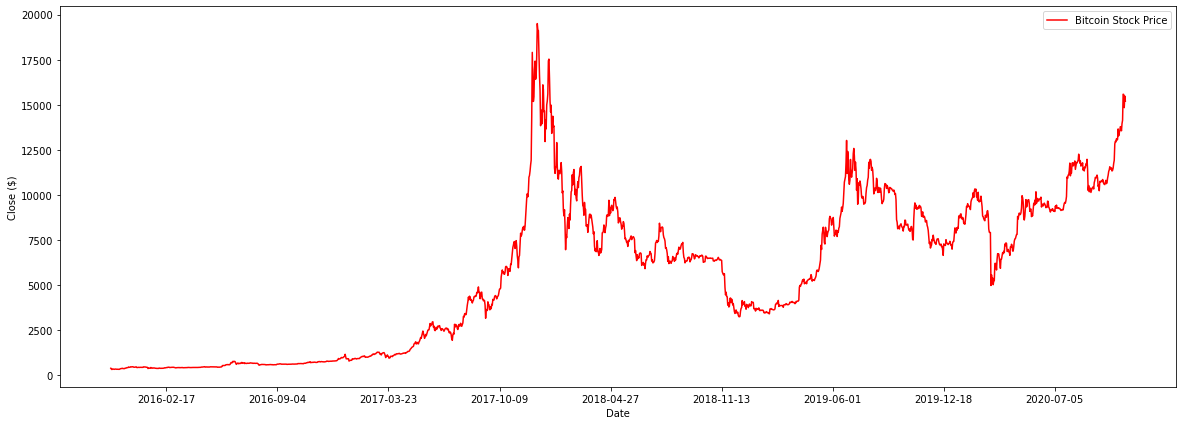

In [37]:
df['Close'] = df['Close'].astype(float)

plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['Close'].values, label = 'Bitcoin Stock Price', color = 'red')
plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

## Data Preprocessing

In [38]:
num_shape = 1800

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values

Scaling our features using normalization. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently.

In [39]:
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

Now we take one row and cut it with a window of 60 elements

In [40]:
X_train = []

#Price on next day
y_train = []

window = 60

for i in range(window, num_shape):
    X_train_ = np.reshape(train_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

## Recurrent Neural Network

### Training of the basic LSTM model

In [41]:
# Initializing the Recurrent Neural Network
model = Sequential()
#Adding the first LSTM layer with a sigmoid activation function and some Dropout regularization
#Units - dimensionality of the output space

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [42]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 200, batch_size = 32);

Epoch 1/200
55/55 [==============================] - 8s 141ms/step - loss: 0.0130
Epoch 2/200
55/55 [==============================] - 8s 139ms/step - loss: 0.0045
Epoch 3/200
55/55 [==============================] - 8s 149ms/step - loss: 0.0047
Epoch 4/200
55/55 [==============================] - 7s 123ms/step - loss: 0.0039
Epoch 5/200
55/55 [==============================] - 7s 124ms/step - loss: 0.0031
Epoch 6/200
55/55 [==============================] - 7s 125ms/step - loss: 0.0031
Epoch 7/200
55/55 [==============================] - 7s 126ms/step - loss: 0.0029
Epoch 8/200
55/55 [==============================] - 7s 123ms/step - loss: 0.0028
Epoch 9/200
55/55 [==============================] - 8s 144ms/step - loss: 0.0025
Epoch 10/200
55/55 [==============================] - 7s 120ms/step - loss: 0.0024
Epoch 11/200
55/55 [==============================] - 7s 121ms/step - loss: 0.0023
Epoch 12/200
55/55 [==============================] - 7s 123ms/step - loss: 0.0021
Epoch 13/200


55/55 [==============================] - 7s 124ms/step - loss: 7.8614e-04
Epoch 99/200
55/55 [==============================] - 8s 137ms/step - loss: 8.4539e-04
Epoch 100/200
55/55 [==============================] - 8s 142ms/step - loss: 8.4957e-04
Epoch 101/200
55/55 [==============================] - 7s 126ms/step - loss: 8.3025e-04
Epoch 102/200
55/55 [==============================] - 7s 123ms/step - loss: 8.9607e-04
Epoch 103/200
55/55 [==============================] - 7s 125ms/step - loss: 7.4626e-04
Epoch 104/200
55/55 [==============================] - 7s 127ms/step - loss: 8.6152e-04
Epoch 105/200
55/55 [==============================] - 8s 138ms/step - loss: 8.2336e-04
Epoch 106/200
55/55 [==============================] - 7s 125ms/step - loss: 7.4719e-04
Epoch 107/200
55/55 [==============================] - 7s 126ms/step - loss: 8.3450e-04
Epoch 108/200
55/55 [==============================] - 7s 131ms/step - loss: 0.0010
Epoch 109/200
55/55 [==============================

55/55 [==============================] - 7s 133ms/step - loss: 7.5386e-04
Epoch 192/200
55/55 [==============================] - 7s 129ms/step - loss: 8.0340e-04
Epoch 193/200
55/55 [==============================] - 7s 128ms/step - loss: 7.9881e-04
Epoch 194/200
55/55 [==============================] - 7s 121ms/step - loss: 6.8513e-04
Epoch 195/200
55/55 [==============================] - 7s 121ms/step - loss: 7.2892e-04
Epoch 196/200
55/55 [==============================] - 7s 122ms/step - loss: 8.0403e-04
Epoch 197/200
55/55 [==============================] - 7s 122ms/step - loss: 7.5504e-04
Epoch 198/200
55/55 [==============================] - 7s 124ms/step - loss: 6.0468e-04
Epoch 199/200
55/55 [==============================] - 7s 123ms/step - loss: 7.3694e-04
Epoch 200/200
55/55 [==============================] - 7s 127ms/step - loss: 6.7665e-04


## Prediction

In [43]:
df_volume = np.vstack((train, test))

inputs = df_volume[df_volume.shape[0] - test.shape[0] - window:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

num_2 = df_volume.shape[0] - num_shape + window

X_test = []

for i in range(window, num_2):
    X_test_ = np.reshape(inputs[i-window:i, 0], (window, 1))
    X_test.append(X_test_)
    
X_test = np.stack(X_test)

In [44]:
predict = model.predict(X_test)
predict = sc.inverse_transform(predict)

In [45]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 153162.81219565144
MAE: 276.4532643950892
RMSE: 391.36020773151097


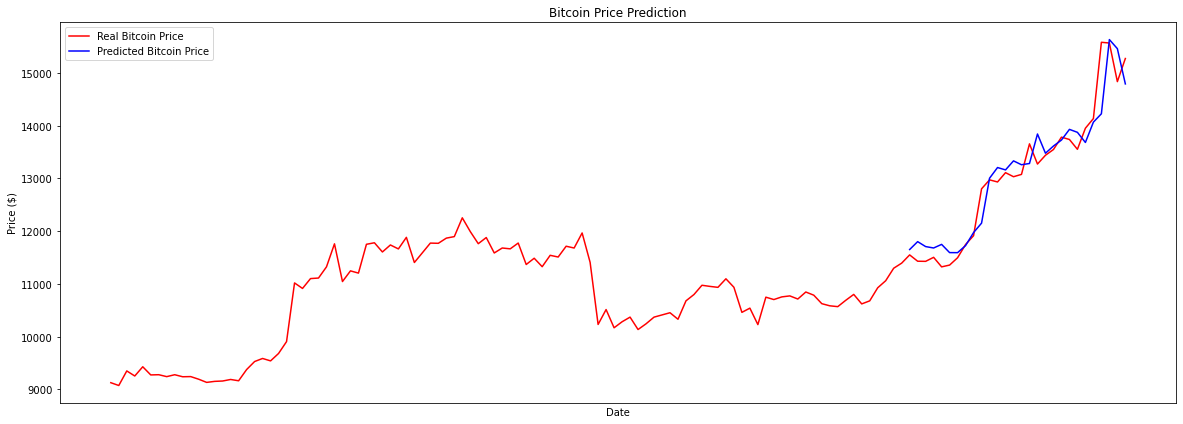

In [46]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'red', label = 'Real Bitcoin Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted Bitcoin Price')
plt.xticks(np.arange(100,df[1800:].shape[0],20))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### 20-day prediction

In [47]:
pred_ = predict[-1].copy()
prediction_full = []
window = 60
df_copy = df.iloc[:, 1:2][1:].values

for j in range(20):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = sc.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = model.predict(X_test_)
    pred_ = sc.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]

In [48]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1,1)))

In [49]:
df_date = df[['Date']]

for h in range(20):
    df_date_add = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(df_date_add)
df_date = df_date.reset_index(drop=True)

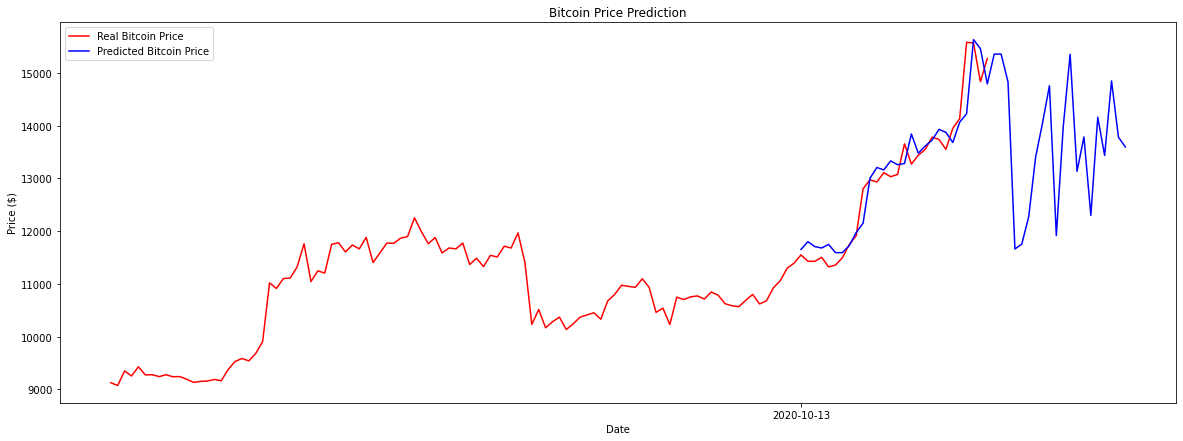

In [50]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'red', label = 'Real Bitcoin Price')
plt.plot(df_date['Date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Predicted Bitcoin Price')
plt.xticks(np.arange(100,df[1700:].shape[0],200))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# GRU

In [51]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 60, 50)            7950      
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
gru_9 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
gru_10 (GRU)                 (None, 60, 50)            15300     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
gru_11 (GRU)                 (None, 50)               

In [ ]:
modelGRU.compile(optimizer='adam', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
109/109 [==============================] - 13s 117ms/step - loss: 0.0088
Epoch 2/200
109/109 [==============================] - 12s 113ms/step - loss: 0.0031
Epoch 3/200
109/109 [==============================] - 12s 115ms/step - loss: 0.0024
Epoch 4/200
109/109 [==============================] - 13s 117ms/step - loss: 0.0022
Epoch 5/200
109/109 [==============================] - 12s 115ms/step - loss: 0.0021
Epoch 6/200
109/109 [==============================] - 12s 114ms/step - loss: 0.0020
Epoch 7/200
109/109 [==============================] - 12s 113ms/step - loss: 0.0018
Epoch 8/200
109/109 [==============================] - 12s 114ms/step - loss: 0.0020
Epoch 9/200
109/109 [==============================] - 13s 119ms/step - loss: 0.0015
Epoch 10/200
109/109 [==============================] - 12s 113ms/step - loss: 0.0016
Epoch 11/200
109/109 [==============================] - 12s 113ms/step - loss: 0.0015
Epoch 12/200
109/109 [==============================] - 12s 111

109/109 [==============================] - 13s 120ms/step - loss: 7.9926e-04
Epoch 94/200
109/109 [==============================] - 12s 113ms/step - loss: 8.0695e-04
Epoch 95/200
109/109 [==============================] - 12s 113ms/step - loss: 6.8578e-04
Epoch 96/200
109/109 [==============================] - 12s 113ms/step - loss: 7.4922e-04
Epoch 97/200
109/109 [==============================] - 13s 115ms/step - loss: 8.0466e-04
Epoch 98/200
109/109 [==============================] - 13s 118ms/step - loss: 7.4982e-04
Epoch 99/200
109/109 [==============================] - 12s 113ms/step - loss: 8.4204e-04
Epoch 100/200
109/109 [==============================] - 13s 115ms/step - loss: 7.2124e-04
Epoch 101/200
109/109 [==============================] - 12s 113ms/step - loss: 8.4960e-04
Epoch 102/200
109/109 [==============================] - 13s 118ms/step - loss: 7.5385e-04
Epoch 103/200
109/109 [==============================] - 13s 115ms/step - loss: 7.0570e-04
Epoch 104/200
109/1

In [ ]:
predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)

In [ ]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'red', label = 'Real Bitcoin Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted Bitcoin Price')
plt.xticks(np.arange(100,df[1800:].shape[0],20))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

### 20-day prediction

In [ ]:
pred_ = predict[-1].copy()
prediction_full = []
window = 60
df_copy = df.iloc[:, 1:2][1:].values

for j in range(20):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = sc.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = modelGRU.predict(X_test_)
    pred_ = sc.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]

In [ ]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1,1)))

df_date = df[['Date']]

for h in range(20):
    kk = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    kk = pd.DataFrame([kk.strftime("%Y-%m-%d")], columns=['Date'])
    df_date = df_date.append(kk)
df_date = df_date.reset_index(drop=True)

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[1700:], df_volume[1700:], color = 'red', label = 'Real Bitcoin Price')
plt.plot(df_date['Date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Predicted Bitcoin Price')
plt.xticks(np.arange(100,df_date[1700:].shape[0],20))
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Did you find this Notebook useful?
# Show your appreciation with an upvote
Thank you